## 1. Problem Definition

### The Problem
Breast cancer is one of the most common cancers worldwide, and early detection plays a critical role in improving survival rates. The challenge lies in accurately classifying tumors as either malignant (cancerous) or benign (non-cancerous) based on patient data.

### Importance
Misclassification of tumors can lead to severe consequences, such as unnecessary medical procedures or missed diagnoses. Developing a reliable and efficient machine learning model to assist in the diagnosis process can significantly enhance the speed and accuracy of medical decision-making, potentially saving lives and reducing healthcare costs.

### Type of Problem
This is a **binary classification problem**, where the goal is to predict one of two categories: malignant or benign. The dataset contains labeled instances with features derived from fine needle aspirates of breast masses, such as mean radius, texture, and concavity. Machine learning algorithms will be used to learn patterns from this data and make accurate predictions for new cases.


## 2. Data Collection

To begin building the model, the Wisconsin Breast Cancer dataset will be loaded from the `scikit-learn` library. This dataset is preprocessed and ready for use, containing features extracted from digitized images of fine needle aspirates of breast masses. The following code demonstrates how to load the dataset and explore its basic characteristics:

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
cancer_data = load_breast_cancer()

# Create a DataFrame for easier exploration
data = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
data['target'] = cancer_data.target

# Display the shape of the dataset
print("Dataset shape:", data.shape)

# Display the first few rows of the dataset
print(data.head())

# Display a summary of the dataset
print("Dataset features:\n", cancer_data.feature_names)
print("Target classes:", cancer_data.target_names)

Dataset shape: (569, 31)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  wor

## 3. Data Processing

In this step, the dataset is prepared for analysis by checking for missing values and ensuring data consistency. Since the scikit-learn version of the Wisconsin Breast Cancer dataset is preprocessed, missing values are not expected. However, it is good practice to confirm this assumption before proceeding further. The following code performs this check:

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


## 4. Exploratory Data Analysis

Exploratory Data Analysis (EDA) helps understand the dataset by visualizing key characteristics, patterns, and relationships among features. Below are various plots and their significance:

### 1. Distribution of Target Classes

Understanding the balance between malignant and benign cases is essential to ensure a fair model.

1. Use a count plot to visualize the distribution of target classes.
2. Label the target classes (e.g., 0 = Malignant, 1 = Benign).

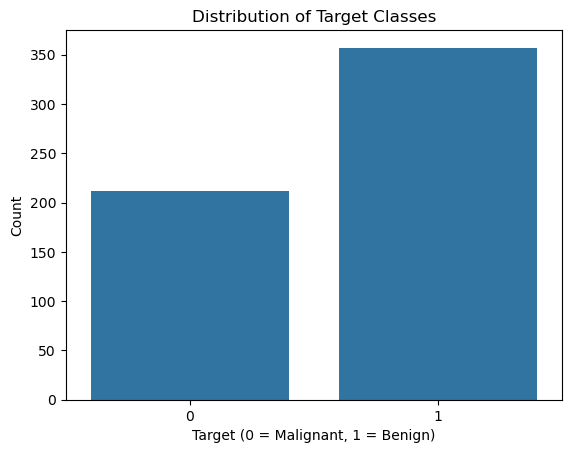

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot target distribution
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Classes')
plt.xlabel('Target (0 = Malignant, 1 = Benign)')
plt.ylabel('Count')
plt.show()

### 2. Correlation Heatmap

A heatmap shows correlations among features. High correlations may indicate redundancy.

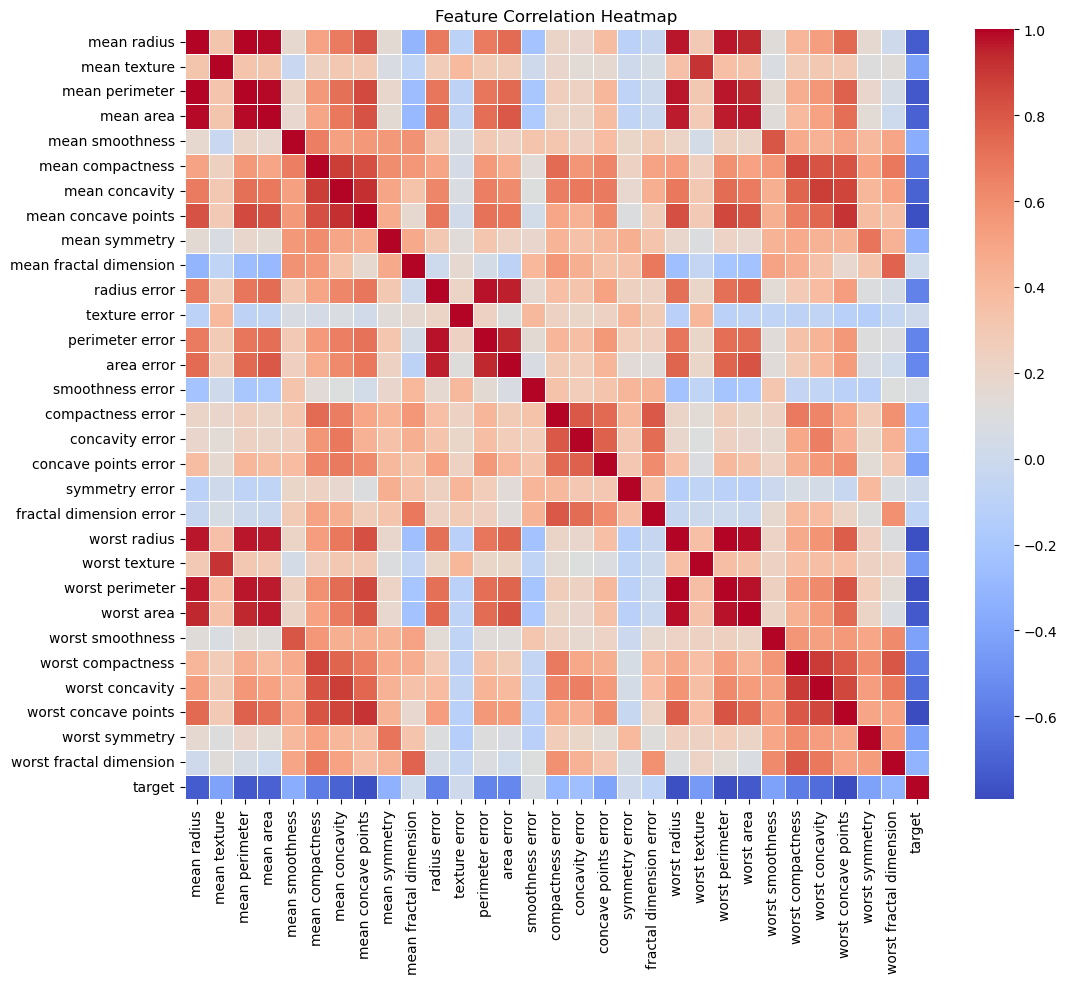

In [9]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

### 3. Pairplot of Selected Features

Visualizing relationships between features helps identify trends and separability between classes.

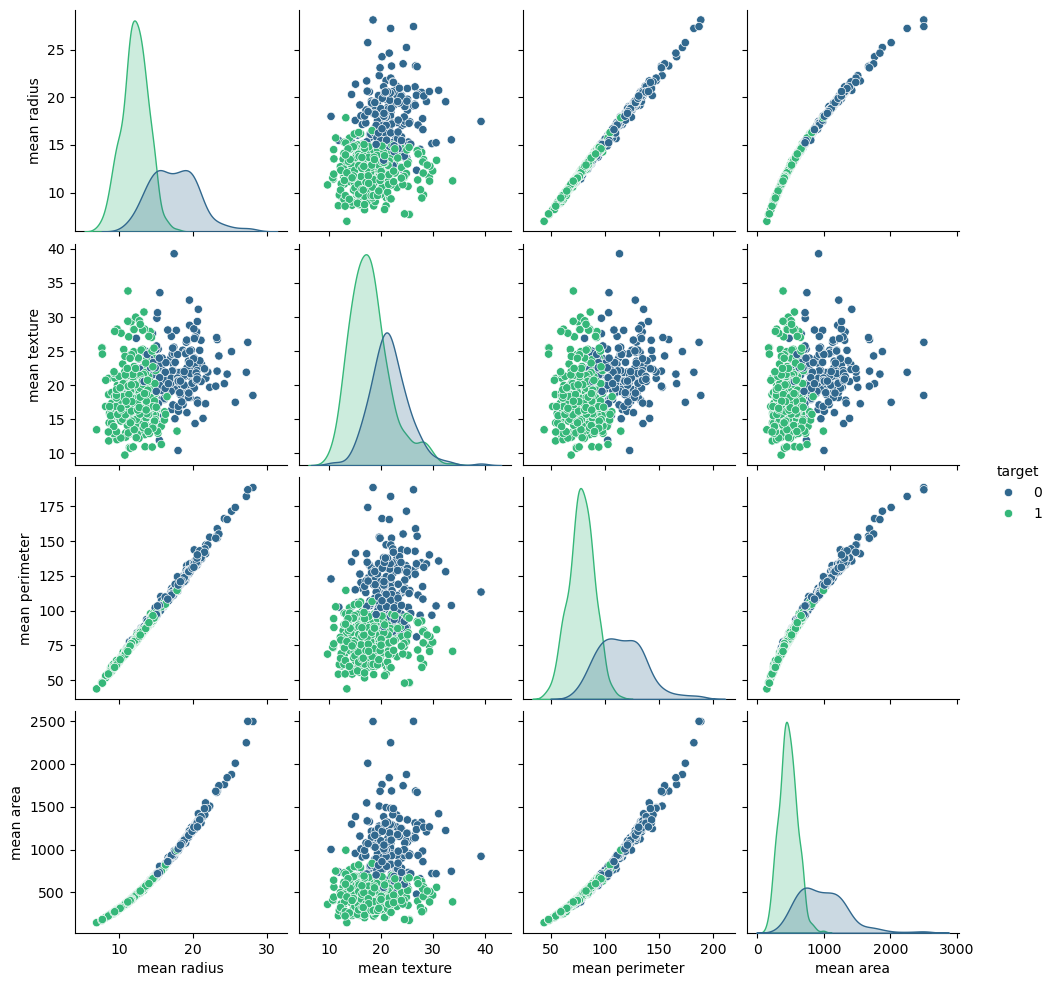

In [11]:
# Select a subset of features for pairplot
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']

# Add target to subset for visualization
pairplot_data = data[selected_features + ['target']]

sns.pairplot(pairplot_data, hue='target', palette='viridis', diag_kind='kde')
plt.show()

### 4. Boxplot of Feature Distribution

Boxplots show the distribution and outliers of key features by target class.


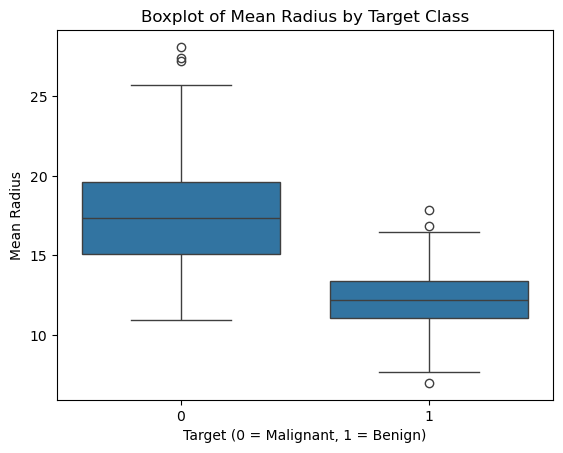

In [13]:
# Boxplot for a specific feature
sns.boxplot(x='target', y='mean radius', data=data)
plt.title('Boxplot of Mean Radius by Target Class')
plt.xlabel('Target (0 = Malignant, 1 = Benign)')
plt.ylabel('Mean Radius')
plt.show()

## 5. Decision Tree Model 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)




DecisionTreeClassifier(random_state=42)

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9473684210526315


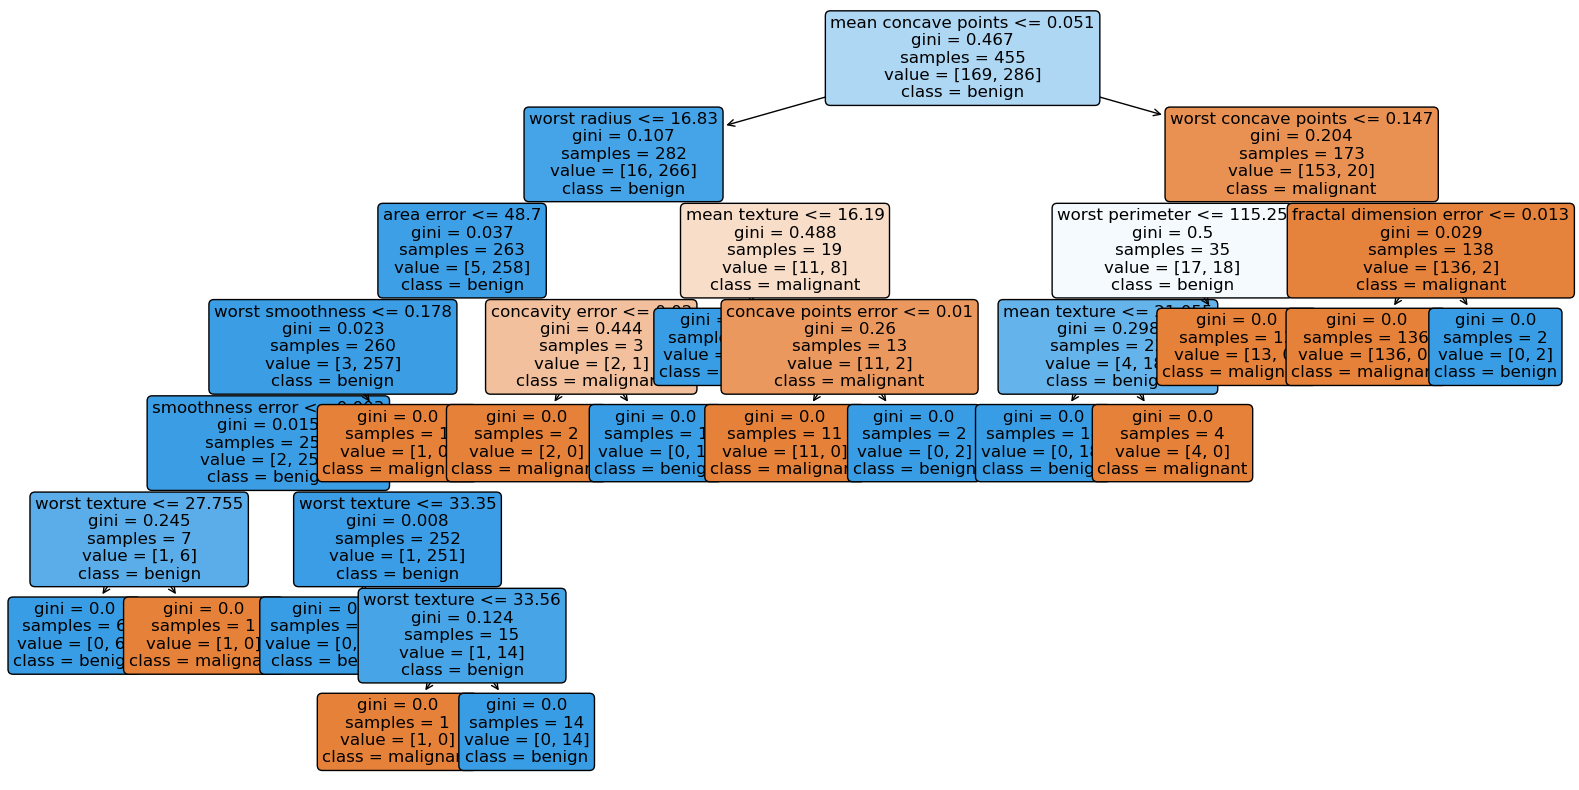

In [17]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=cancer_data.feature_names, class_names=cancer_data.target_names, rounded=True, fontsize=12)
plt.savefig("decision_tree.png", dpi=300)
plt.show()

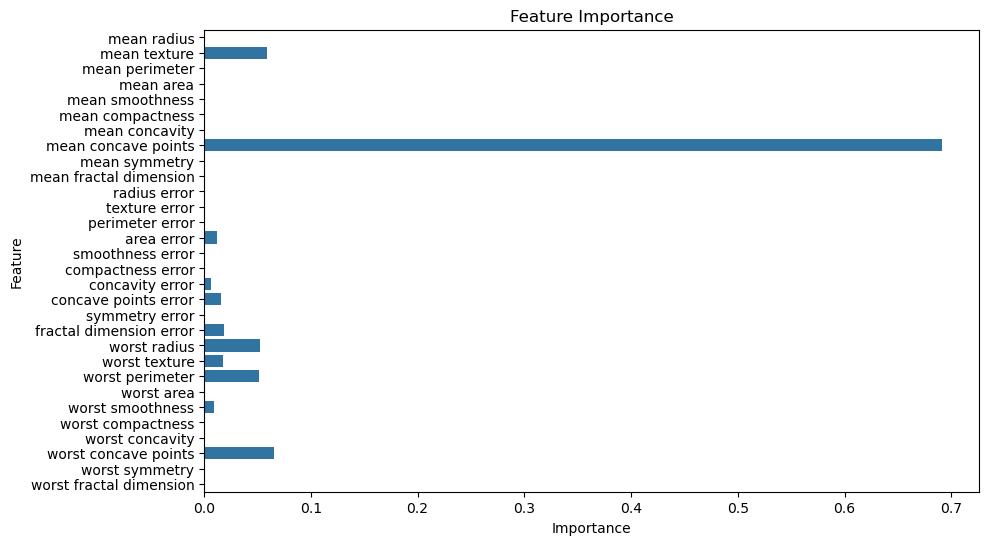

In [18]:
# Get feature importances
feature_importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=cancer_data.feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


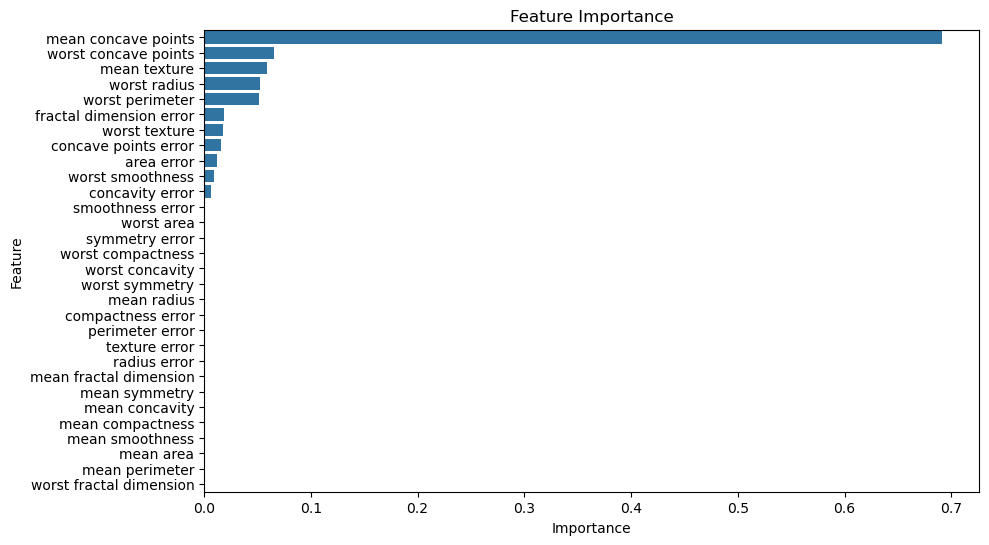

In [19]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importances
feature_df = pd.DataFrame({
    'Feature': cancer_data.feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_df_sorted = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df_sorted)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


### Feature Selection and Model Retraining

#### Objective:  
To evaluate the performance of a Decision Tree Classifier when trained on the **top 5 most important features** versus all features.

---

#### Steps:  

1. **Feature Importance Calculation**:  
   - Using the trained model, calculate the importance of each feature (`model.feature_importances_`).
   - Select the top 5 features based on their importance.

2. **Subset Dataset Creation**:  
   - Create a new dataset containing only the top 5 features.

3. **Model Retraining**:  
   - Train a new Decision Tree Classifier using the subset dataset.

4. **Performance Comparison**:  
   - Evaluate the model's accuracy on the test set and compare it with the accuracy from the original model using all features.

---

In [34]:
import numpy as np

# Get the indices of the top 5 most important features
top_5_indices = np.argsort(feature_importances)[-5:]  # Get the indices of the top 5 features
top_5_features = [cancer_data.feature_names[i] for i in top_5_indices]  # Get the feature names

# Create a subset dataset with only the top 5 features
X_top_5 = data[top_5_features]
X_top_5

,worst perimeter,worst radius,mean texture,worst concave points,mean concave points
0,184.60,25.380,10.38,0.2654,0.14710
1,158.80,24.990,17.77,0.1860,0.07017
2,152.50,23.570,21.25,0.2430,0.12790
3,98.87,14.910,20.38,0.2575,0.10520
4,152.20,22.540,14.34,0.1625,0.10430
...,...,...,...,...,...
564,166.10,25.450,22.39,0.2216,0.13890
565,155.00,23.690,28.25,0.1628,0.09791
566,126.70,18.980,28.08,0.1418,0.05302
567,184.60,25.740,29.33,0.2650,0.15200


In [36]:
# Split the subset dataset into training and testing sets
X_train_top_5, X_test_top_5, y_train, y_test = train_test_split(X_top_5, y, test_size=0.2, random_state=42)

# Build the decision tree model
model_top_5 = DecisionTreeClassifier(random_state=42)
model_top_5.fit(X_train_top_5, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
# Make predictions on the test set
y_pred_top_5 = model_top_5.predict(X_test_top_5)

# Evaluate the accuracy of the model
accuracy_top_5 = accuracy_score(y_test, y_pred_top_5)
print("Accuracy Score with Top 5 Features:", accuracy_top_5)

Accuracy Score with Top 5 Features: 0.9385964912280702


#### Results:  

| Model          | Features Used      | Accuracy Score |
|----------------|--------------------|----------------|
| Original Model | All Features       | **0.9474**     |
| Reduced Model  | Top 5 Features     | **0.9386**     |

#### Insights:  
- The model trained on only the top 5 features achieves comparable accuracy to the one trained on all features, with a slight drop of ~0.9%.  
- This indicates that the most important features capture most of the predictive power, allowing for dimensionality reduction without significant performance loss.  

#### Conclusion:  
Feature selection can simplify the model and reduce computational costs while maintaining high accuracy, making it a valuable step in machine learning workflows.

---

### Exploring the Impact of Hyperparameters on Decision Tree Performance  

#### **Objective**  
To investigate how hyperparameter tuning affects the performance of a Decision Tree Classifier, particularly using `max_depth` and `min_samples_split`.


#### **Key Steps**  

1. **Identify Hyperparameters for Tuning**:  
   - `max_depth`: Limits the maximum depth of the tree to prevent overfitting or underfitting.  
   - `min_samples_split`: Defines the minimum number of samples required to split an internal node, controlling tree complexity.

2. **Experiment with Combinations**:  
   - Tested individual values for `max_depth` (3, 5, and None).  
   - Tested individual values for `min_samples_split` (5, 10).  
   - Combined both parameters (`max_depth=5`, `min_samples_split=10`) to evaluate their interaction.

3. **Evaluate Performance**:  
   - Used **accuracy** as the evaluation metric on the test dataset.  
   - Visualized results using a horizontal bar chart for easy comparison.

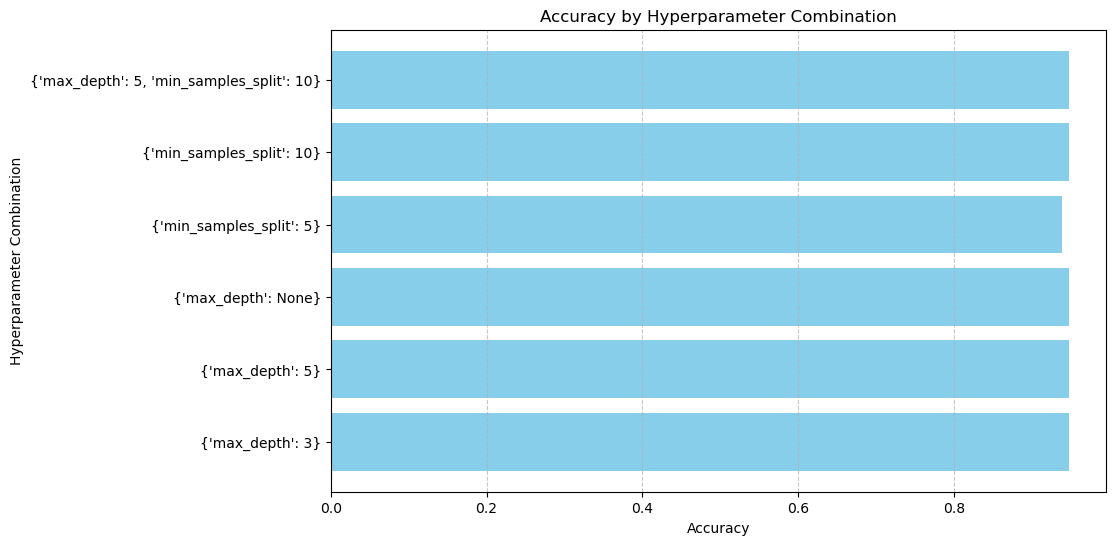

[({'max_depth': 3}, 0.9473684210526315), ({'max_depth': 5}, 0.9473684210526315), ({'max_depth': None}, 0.9473684210526315), ({'min_samples_split': 5}, 0.9385964912280702), ({'min_samples_split': 10}, 0.9473684210526315), ({'max_depth': 5, 'min_samples_split': 10}, 0.9473684210526315)]


In [53]:
import matplotlib.pyplot as plt

# Function to experiment with hyperparameters
def experiment_decision_tree(params):
    # Train and test the model with given hyperparameters
    model = DecisionTreeClassifier(random_state=42, **params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Define hyperparameter combinations to test
param_grid = [
    {'max_depth': 3},
    {'max_depth': 5},
    {'max_depth': None},  # Default
    {'min_samples_split': 5},
    {'min_samples_split': 10},
    {'max_depth': 5, 'min_samples_split': 10},  # Combine parameters
]

# Experiment with different parameters and store results
results = []
for params in param_grid:
    acc = experiment_decision_tree(params)
    results.append((params, acc))

# Convert results to a more visualizable format
param_labels = [str(params) for params, _ in results]
accuracies = [acc for _, acc in results]

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(param_labels, accuracies, color='skyblue')
plt.title('Accuracy by Hyperparameter Combination')
plt.xlabel('Accuracy')
plt.ylabel('Hyperparameter Combination')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


print(results)




#### **Results**  

| Hyperparameter Combination         | Accuracy      |
|------------------------------------|---------------|
| `max_depth=3`                      | **0.9474**    |
| `max_depth=5`                      | **0.9474**    |
| `max_depth=None` (Default)         | **0.9474**    |
| `min_samples_split=5`              | 0.9386        |
| `min_samples_split=10`             | **0.9474**    |
| `max_depth=5, min_samples_split=10`| **0.9474**    |

---

#### **Insights**  

1. **Stable Accuracy with `max_depth`**:  
   - No significant change in accuracy was observed across different values of `max_depth`.  
   - This suggests the tree structure does not overfit or underfit significantly within this dataset.

2. **Impact of `min_samples_split`**:  
   - Accuracy dropped slightly (0.9386) when `min_samples_split=5`.  
   - Higher values (e.g., 10) maintained accuracy similar to the default, indicating reduced overfitting.

3. **Combined Parameters**:  
   - Combining `max_depth=5` and `min_samples_split=10` resulted in the same accuracy (0.9474) as the default model.  
   - This shows that the default configuration is already well-suited for the dataset.

---

#### **Conclusions**  

- **Model Stability**: The Decision Tree model is robust to changes in `max_depth` and `min_samples_split` within reasonable ranges for this dataset.  
- **Parameter Tuning**: While no major improvements were observed, tuning parameters can help in datasets where overfitting or underfitting is a concern.  
- **Practical Recommendation**: For this dataset, the default parameters work well, but testing hyperparameters remains essential for generalization on new or more complex datasets.  

--- 


### Logistic Regression: Understanding the Concept

Logistic Regression is a statistical method used for binary classification tasks. Unlike linear regression, which predicts continuous values, logistic regression predicts probabilities that an instance belongs to a specific class (e.g., 0 or 1). It uses the logistic (sigmoid) function to model the relationship between the features and the target variable, ensuring output values range between 0 and 1.

#### **Why Use Logistic Regression?**  
- It is simple, efficient, and interpretable.  
- Suitable for datasets with a linear decision boundary between classes.  
- It provides probabilities, which can be useful for understanding model confidence.

#### **Application to the Breast Cancer Dataset**  
In this dataset:
- **Input Features**: Numeric metrics such as `mean radius`, `mean texture`, etc., describing tumor characteristics.  
- **Target Variable**: Binary classification (`0 = Malignant`, `1 = Benign`).  
- **Model's Purpose**: To predict whether a tumor is malignant or benign based on its features.  

#### **What Logistic Regression Does Here**  
1. The model assigns **weights** to each feature to evaluate its contribution to predicting the target.
2. Using the sigmoid function, it outputs a probability between 0 and 1 for each instance in the test set.
3. A threshold (e.g., 0.5) is applied to classify the instance as malignant (0) or benign (1).

#### **Interpretation of Results**  
- High accuracy indicates that the model can effectively separate the two classes based on the tumor's features.  
- Analyzing feature coefficients can provide insights into which features have the strongest impact on predictions.  

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate accuracy
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy Score:", logistic_accuracy)


Logistic Regression Accuracy Score: 0.956140350877193


C:\Users\evisp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest: Understanding the Concept
 
Random Forest is an ensemble machine learning method that combines multiple **decision trees** to improve classification performance. Each tree is built using a random subset of data and features, and the final prediction is made by averaging (for regression) or voting (for classification) across all trees. This approach reduces overfitting and increases model robustness.

#### **Why Use Random Forest?**  
- Handles both linear and non-linear relationships well.  
- Reduces overfitting compared to a single decision tree by averaging multiple models.  
- Provides feature importance scores, highlighting which features are most relevant for prediction.

#### **Application to the Breast Cancer Dataset**  
In this dataset:
- **Input Features**: Tumor characteristics such as `mean radius`, `mean texture`, etc.  
- **Target Variable**: Binary classification (`0 = Malignant`, `1 = Benign`).  
- **Model's Purpose**: To classify tumors as malignant or benign using multiple decision trees that collectively decide the output.

#### **What Random Forest Does Here**  
1. **Bootstrap Sampling**: Creates random subsets of the training data to train individual decision trees.  
2. **Feature Randomization**: Each tree considers only a random subset of features, ensuring diversity among trees.  
3. **Voting Mechanism**: For classification, each tree casts a vote for either class (malignant or benign), and the majority vote determines the final prediction.

#### **Interpretation of Results**  
- High accuracy indicates that the ensemble model effectively captures complex relationships in the data.  
- The **feature importance scores** can help identify which tumor features are most critical for classification.  
- The model's robustness makes it less prone to overfitting, especially with large and diverse datasets.

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy Score:", rf_accuracy)


Random Forest Accuracy Score: 0.9649122807017544


### **Model Comparison and Insights**

#### **Accuracy Results**
| **Model**              | **Accuracy Score**     |
|-------------------------|------------------------|
| **Decision Tree**       | 0.9474 (94.74%)       |
| **Logistic Regression** | 0.9561 (95.61%)       |
| **Random Forest**       | 0.9649 (96.49%)       |

#### **Key Observations**

1. **Random Forest Achieved the Highest Accuracy**  
   - The ensemble approach of Random Forest, with its combination of multiple decision trees and feature randomness, leads to the best performance on this dataset.
   - Its robustness to overfitting and ability to capture complex patterns likely contributed to its superior accuracy.

2. **Logistic Regression Performed Slightly Better than Decision Tree**  
   - Logistic Regression, being simpler and more linear in nature, performed marginally better than the standalone Decision Tree.
   - This suggests that the dataset may have a partially linear decision boundary that Logistic Regression effectively captures.

3. **Decision Tree Performance is Competitive**  
   - Despite being the simplest model among the three, the Decision Tree performed well. However, it may be slightly more prone to overfitting due to its single-tree structure.

#### **Insights and Recommendations**
1. **Suitability of Models**:  
   - **Random Forest** is ideal for high accuracy and generalization, especially for complex datasets.  
   - **Logistic Regression** is a good choice for simplicity, interpretability, and linear problems.  
   - **Decision Tree** is useful for understanding feature interactions and quick, interpretable predictions but can be improved with tuning or ensemble methods.  

2. **Trade-offs**:  
   - Logistic Regression is computationally faster but limited in handling non-linear relationships.  
   - Random Forest, while robust, is computationally more intensive.  

3. **Feature Importance**:  
   - Random Forest provides insights into feature importance, which can guide feature selection or further analysis.  

#### **Conclusion**
- For this dataset, **Random Forest** is the best-performing model, achieving 96.49% accuracy.  
- If interpretability and simplicity are priorities, **Logistic Regression** is a close alternative.  
- The **Decision Tree**, though slightly less accurate, provides a baseline understanding of the problem and can be part of ensemble methods for improvement.  